In [ ]:
# conda env - /users/asanb3/conda_env/Stardist

In [1]:
from tifffile import imread
from csbdeep.utils import normalize
from stardist.models import StarDist2D
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

2025-04-14 19:35:15.968588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
###PLACE TO CHANGE##########
# Path to H&E image file 
image_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Input/GSM8509590/GSM8509590_20240522_Xen0024909_IPFTMA5.tif"


In [3]:
img = imread(image_path)

# Load the pretrained model
model = StarDist2D.from_pretrained('2D_versatile_he')

# Percentile normalization of the image
# Adjust min_percentile and max_percentile as needed
min_percentile = 5
max_percentile = 95
img = normalize(img, min_percentile, max_percentile)

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3189189..1.0594594].


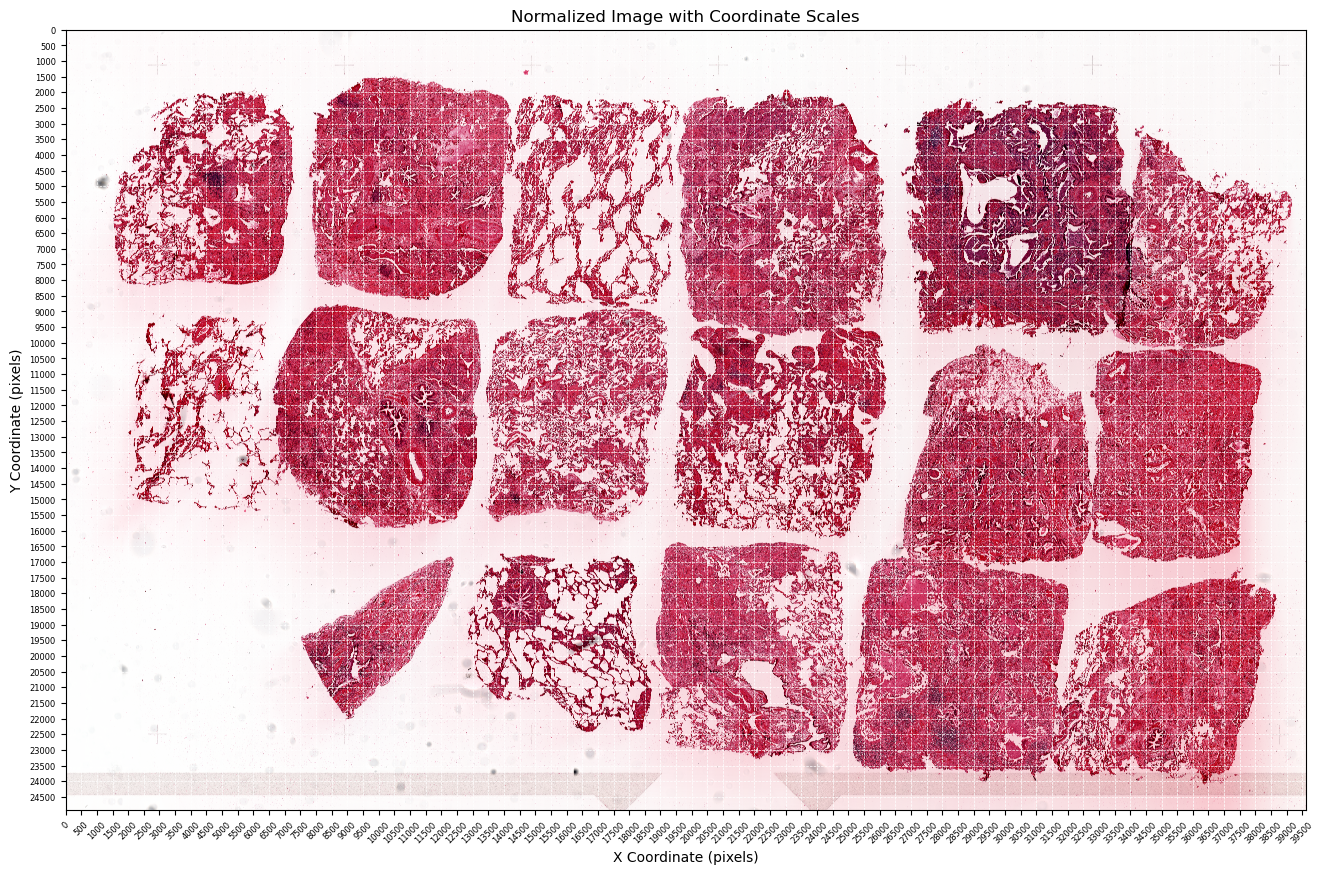

In [4]:
# Display the image
plt.figure(figsize=(16, 16))
plt.imshow(img, cmap='gray')  # Use 'gray' for single-channel images

# Set tick labels with rotation for x-axis
plt.xticks(ticks=range(0, img.shape[1], 500), fontsize=6, rotation=45)  # Rotate x-axis labels
plt.yticks(ticks=range(0, img.shape[0], 500), fontsize=6)  # Keep y-axis labels normal

# Alternative way using tick_params (for finer control)
plt.tick_params(axis='x', labelrotation=45)  # Rotates x-axis tick labels

# Add grid for better visualization (optional)
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Adjust axis labels and title font size separately
plt.xlabel("X Coordinate (pixels)", fontsize=10)  
plt.ylabel("Y Coordinate (pixels)", fontsize=10)  
plt.title("Normalized Image with Coordinate Scales", fontsize=12)  

plt.show()

In [49]:
###PLACE TO CHANGE##########
# Define the crop box (x_min, y_min, x_max, y_max)
crop_box = (19300, 9500, 26000, 16300)

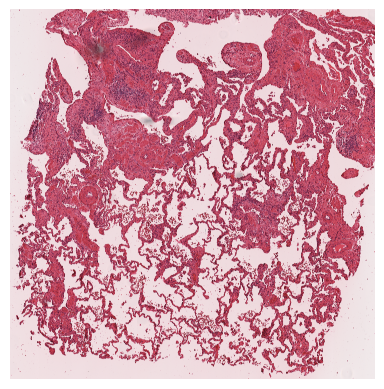

In [50]:
# Increase Pillow's pixel limit (if needed)
Image.MAX_IMAGE_PIXELS = None  # Removes size restriction

# Open the image using Pillow
img = Image.open(image_path)

# Crop the image
cropped_img = img.crop(crop_box)

# Convert cropped image to NumPy array
#cropped_img = np.array(cropped_img)

# Display the cropped image using matplotlib before saving
plt.imshow(cropped_img)
plt.axis('off')  # Hide the axes
plt.show()

In [51]:
###PLACE TO CHANGE##########
# Save the cropped image as a TIFF file
cropped_img.save('/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/01.Subset/GSM8509590/region4_cropped.tiff', format="TIFF")


In [ ]:
# Next step is alignment using Loupe Browser